In [3]:
import pandas as pd 
import numpy as np

## Example HTML

[Video Link](https://www.youtube.com/watch?v=KokJHxiE14s)

In [4]:
dfs = pd.read_html("https://en.wikipedia.org/wiki/100_metres")

In [5]:
mens100m = dfs[5]
womens100m = dfs[6]

In [6]:
mens100m["Year"].head(3)

0    1972
1    1973
2    1974
Name: Year, dtype: int64

In [7]:
mens100m["Time"] = mens100m["Time"].str.replace("[A]", "", regex=False) \
    .str.replace("h", "", regex=False)


In [8]:
mens100m["Time"] = pd.to_numeric(mens100m["Time"])

In [9]:
womens100m["Time"] = womens100m["Time"].str.replace("[A]", "", regex=False) \
    .str.replace("h", "", regex=False) \
    .str.replace("a", "", regex=False) \
    .str.replace("[]", "", regex=False)
womens100m["Time"] = pd.to_numeric(womens100m["Time"])


## Plot the DATA

In [10]:
import matplotlib.pyplot as plt 
plt.style.use("ggplot")
import seaborn as sns
color_pal = sns.color_palette()

In [11]:
# Aggiungo colonna composta da Atleta ed anno
mens100m["Name"] = mens100m["Year"].astype("str") + ":" + mens100m["Athlete"]
womens100m["Name"] = womens100m["Year"].astype("str") + ":" + womens100m["Athlete"]

In [12]:
mens100m.head(5)

,Year,Time,Athlete,Place,Name
0,1972,10.07,Valeriy Borzov (URS),Munich,1972:Valeriy Borzov (URS)
1,1973,10.15,Steve Williams (USA),Dakar,1973:Steve Williams (USA)
2,1974,9.90,Steve Williams (USA),Los Angeles,1974:Steve Williams (USA)
3,1975,10.05,Steve Riddick (USA),Zürich,1975:Steve Riddick (USA)
4,1976,10.06,Hasely Crawford (TRI),Montreal,1976:Hasely Crawford (TRI)


In [13]:
womens100m.head(5)

,Year,Time,Athlete,Place,Name
0,1972,11.07,Renate Stecher (GDR),Munich,1972:Renate Stecher (GDR)
1,1973,11.07,Renate Stecher (GDR),Dresden,1973:Renate Stecher (GDR)
2,1974,11.13,Irena Szewinska (POL),Rome,1974:Irena Szewinska (POL)
3,1975,11.13,Renate Stecher (GDR),Dresden,1975:Renate Stecher (GDR)
4,1976,11.01,Annegret Richter (FRG),Montreal,1976:Annegret Richter (FRG)


<function matplotlib.pyplot.show(close=None, block=None)>

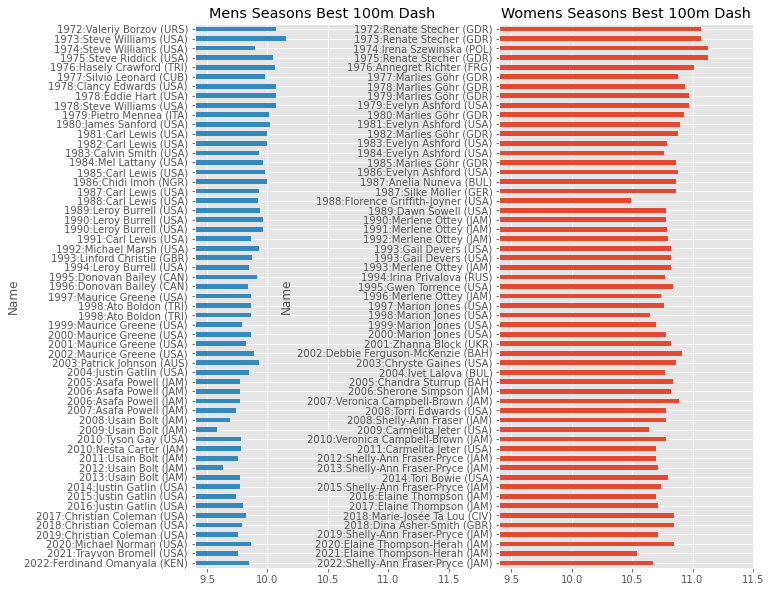

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(10, 10))
mens100m.sort_values("Year", ascending=False) \
    .set_index("Name")["Time"].plot(kind="barh", ax = axs[0], color = color_pal[1])
ax = axs[0].set_xlim(9.4, 11.5)
ax = axs[0].set_title("Mens Seasons Best 100m Dash")

womens100m.sort_values("Year", ascending=False) \
    .set_index("Name")["Time"].plot(kind="barh", ax = axs[1])
ax = axs[1].set_xlim(9.4, 11.5)
ax = axs[1].set_title("Womens Seasons Best 100m Dash")
plt.show


## Save DATAset in CSV

In [21]:
mens100m.to_csv("Maschi100.csv", index=False)